# **Regression in DL with TensorFlow**

In [1]:
# find tensorflow version 
import tensorflow as tf
print('TensorFlow:', tf.__version__)

TensorFlow: 2.12.0


In [2]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
# Load the diamonds dataset 
df= sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# preprocessing 
X=df.drop('price', axis=1)
y=df['price']

# encode the categorical variables 
le = LabelEncoder()
X['cut'] = le.fit_transform(X['cut'])
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Create a neural network architecture 
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=X_train.shape[1:]), # input layer without any activation function
    tf.keras.layers.Dense(32, activation='relu'), # hidden layer with 16 neurons and relu activation function
    tf.keras.layers.Dense(16, activation='relu'), # hidden layer with 8 neurons and relu activation function
    tf.keras.layers.Dense(1), # output layer
])

In [38]:
# compiling the  model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
# train the model
model.fit(X_train, y_train, epochs=4, verbose=1, validation_split=0.2)

Epoch 1/4
1079/1079 [==============================] - 2s 2ms/step - loss: 9444895.0000 - val_loss: 9042573.0000
Epoch 2/4
1079/1079 [==============================] - 2s 1ms/step - loss: 8450782.0000 - val_loss: 8025507.0000
Epoch 3/4
1079/1079 [==============================] - 2s 1ms/step - loss: 7477620.5000 - val_loss: 7057132.5000
Epoch 4/4
1079/1079 [==============================] - 2s 1ms/step - loss: 6562009.0000 - val_loss: 6159131.5000


In [13]:
# Test loss of the model 
loss=model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

# Validation Loss of the model
loss=model.evaluate(X_test, y_test)

338/338 [==============================] - 0s 925us/step - loss: 6047360.5000
Test loss: 6047360.5
338/338 [==============================] - 0s 889us/step - loss: 6047360.5000


Question: How to find the best number of epoch?

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss', # this command is used to monitor the validation loss
    patience=2, # number of epochs to wait before stopping the training
    restore_best_weights=True # this command is used to restore the best weights of the model
    )

model.fit(
    X_train, y_train,
    epochs=10, # maximum number of epochs to train the model
    validation_split=0.2, # this command is used to split the data into train and validation set
    callbacks=[early_stopping], # This command is used to stop the training when the validation loss doesn't improve
)

Epoch 1/10
1079/1079 [==============================] - 2s 1ms/step - loss: 2363892.0000 - val_loss: 2155442.7500
Epoch 2/10
1079/1079 [==============================] - 1s 1ms/step - loss: 2241609.2500 - val_loss: 2025871.6250
Epoch 3/10
1079/1079 [==============================] - 1s 1ms/step - loss: 2136918.7500 - val_loss: 1928481.2500
Epoch 4/10
1079/1079 [==============================] - 1s 1ms/step - loss: 2056598.7500 - val_loss: 1846926.2500
Epoch 5/10
1079/1079 [==============================] - 2s 1ms/step - loss: 1990432.3750 - val_loss: 1783535.7500
Epoch 6/10
1079/1079 [==============================] - 2s 1ms/step - loss: 1935106.6250 - val_loss: 1724355.0000
Epoch 7/10
1079/1079 [==============================] - 1s 1ms/step - loss: 1891061.0000 - val_loss: 1682644.0000
Epoch 8/10
1079/1079 [==============================] - 1s 1ms/step - loss: 1855799.0000 - val_loss: 1642819.6250
Epoch 9/10
1079/1079 [==============================] - 1s 1ms/step - loss: 1825602.7500

In [19]:
print(f'Trained for {len(model.history.epoch)} epochs')

Trained for 10 epochs


In [39]:
history= model.fit(
    X_train, y_train,
    epochs=5, # maximum number of epochs to train the model
    validation_split=0.2, # this command is used to split the data into train and validation set
    callbacks=[early_stopping], # This command is used to stop the training when the validation loss doesn't improve
)

Epoch 1/5
1079/1079 [==============================] - 2s 1ms/step - loss: 18726326.0000 - val_loss: 14964491.0000
Epoch 2/5
1079/1079 [==============================] - 2s 1ms/step - loss: 14268946.0000 - val_loss: 13801884.0000
Epoch 3/5
1079/1079 [==============================] - 2s 1ms/step - loss: 12220561.0000 - val_loss: 10171282.0000
Epoch 4/5
1079/1079 [==============================] - 2s 1ms/step - loss: 6783709.5000 - val_loss: 4179107.7500
Epoch 5/5
1079/1079 [==============================] - 2s 2ms/step - loss: 3153307.2500 - val_loss: 2309416.7500


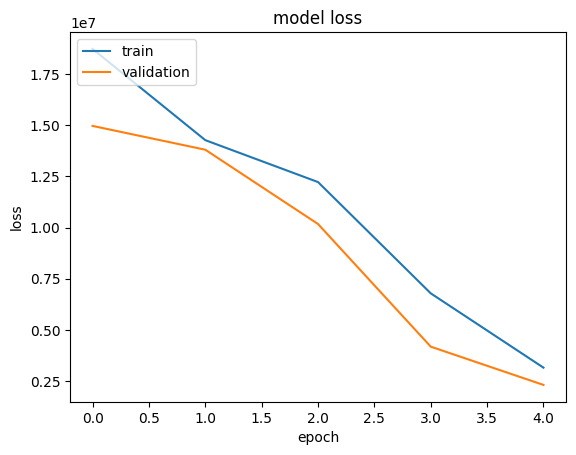

In [40]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()